<a href="https://colab.research.google.com/github/aviral-shrivastava/Sentimental-analysis/blob/main/twitter_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Naive Bayes Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86         3
     neutral       1.00      1.00      1.00        13
    positive       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.92      0.99      0.95        50
weighted avg       0.98      0.98      0.98        50

Predictions saved to 'naive_bayes_sentiment.csv'.


<ipython-input-3-2cea3e7ce1b6>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Predicted_Sentiment", data=test_data, palette="viridis")


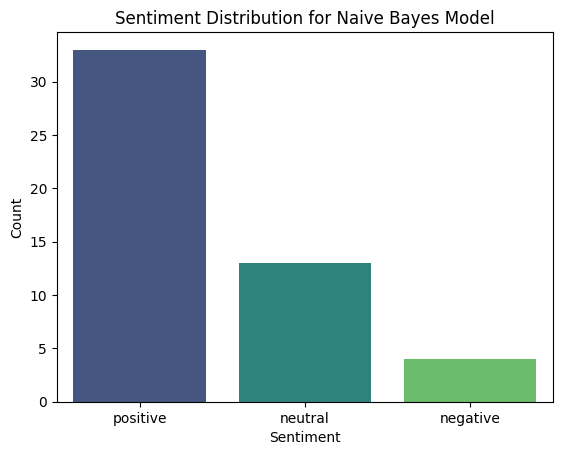

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")

# Load the datasets
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

# Data cleaning functions
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove mentions
    text = re.sub(r"#\w+", "", text)    # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text) # Remove special characters
    text = text.lower()                 # Convert to lowercase
    return text

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Clean and preprocess the training data
train_data["cleaned_text"] = train_data["tweet_text"].apply(clean_text).apply(preprocess_text)
test_data["cleaned_text"] = test_data["tweet_text"].apply(clean_text).apply(preprocess_text)

# Extract features and labels
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data["cleaned_text"])
X_test = tfidf_vectorizer.transform(test_data["cleaned_text"])

y_train = train_data["sentiment"]  # Assumes sentiment labels are in this column
y_test = test_data["sentiment"]

# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model and vectorizer for future use
import joblib
joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Predict sentiment for test data and save to CSV
test_data["Predicted_Sentiment"] = y_pred
test_data.to_csv("naive_bayes_sentiment.csv", index=False)
print("Predictions saved to 'naive_bayes_sentiment.csv'.")

# Plot sentiment distribution
sns.countplot(x="Predicted_Sentiment", data=test_data, palette="viridis")
plt.title("Sentiment Distribution for Naive Bayes Model")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
